## read datasets

### train

In [1]:
import numpy as np
import pandas as pd

train_dataset = 'pendigits.tra'
X_train = []
y_train = []

with open(train_dataset, 'r') as file:
    for line in file:
        values = line.strip().split(',')
        values = [int(val) for val in values]
        label = values[-1]
        X_train.append(values[:-1])
        y_train.append(label)

X_train = pd.DataFrame(np.array(X_train))
y_train = np.array(y_train)

### test

In [2]:
test_dataset = 'pendigits.tes'
X_test = []
y_test = []

with open(test_dataset, 'r') as file:
    for line in file:
        values = line.strip().split(',')
        values = [int(val) for val in values]
        label = values[-1]
        X_test.append(values[:-1])
        y_test.append(label)

X_test = pd.DataFrame(np.array(X_test))
y_test = np.array(y_test)

In [3]:
def dataInfo():
  print(f'Training set shape: {X_train.shape}')
  print(f'Test set shape: {X_test.shape}')
  unique, count = np.unique(y_train, return_counts=True)
  print(f'Training distribution: {dict(zip(unique, count))}')
  unique, count = np.unique(y_test, return_counts=True)
  print(f'Testing distribution: {dict(zip(unique, count))}')

In [4]:
dataInfo()

Training set shape: (7494, 16)
Test set shape: (3498, 16)
Training distribution: {0: 780, 1: 779, 2: 780, 3: 719, 4: 780, 5: 720, 6: 720, 7: 778, 8: 719, 9: 719}
Testing distribution: {0: 363, 1: 364, 2: 364, 3: 336, 4: 364, 5: 335, 6: 336, 7: 364, 8: 336, 9: 336}


## preprocess

In [5]:
from sklearn.preprocessing import MinMaxScaler

def sacle_data(x_train, x_test):
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  return x_train, x_test


In [6]:
X_train, X_test = sacle_data(X_train, X_test)

# train and test model

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def MLP(X_train, X_test, y_test):
  activation_list = ["tanh", "relu","identity", "logistic" ]
  for activation in activation_list :
    mlp_clf = MLPClassifier(max_iter=1000, activation=activation).fit(X_train, y_train)
    y_pred_mlp = mlp_clf.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    print(activation , accuracy_mlp)
    fig, ax = plt.subplots()
    plot_confusion_matrix(mlp_clf, X_test, y_test, display_labels=mlp_clf.classes_, ax=ax, cmap=plt.cm.Blues, values_format='d')
    fig.suptitle(f"Confusion Matrix for {activation}")
    plt.show()

tanh 0.9719839908519153


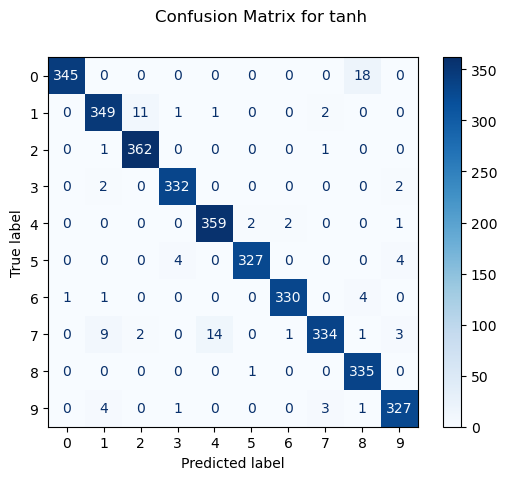

relu 0.9742710120068611


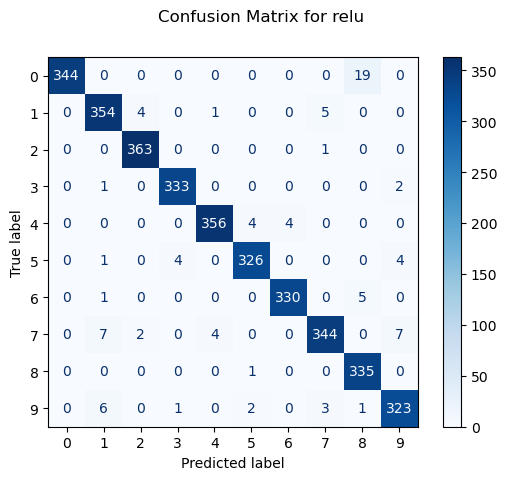

identity 0.9259576901086335


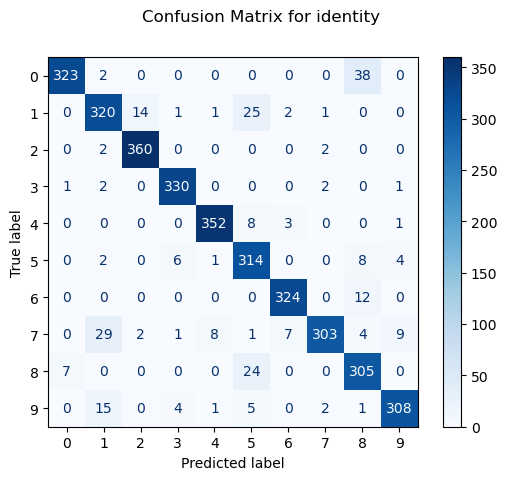

logistic 0.9699828473413379


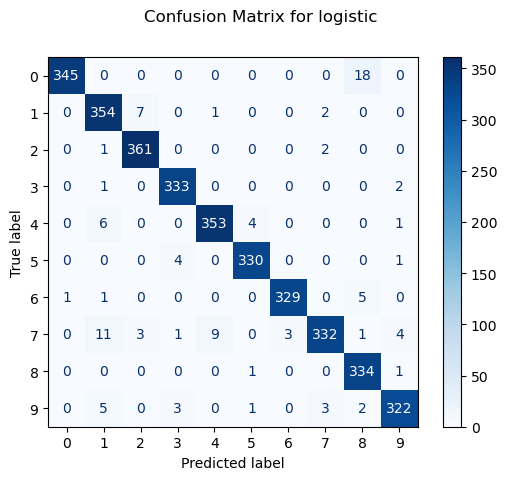

In [34]:
MLP(X_train, X_test, y_test)